# Car Pirce Prediction (PPP - RK's definition - Product Price Prediction)
#### Finding the features and descirbing, which will predict the car price siginificantly

##Business problem
Client wants to predict the price of a car based on the given features

##Converting it into data science problem
We have to describe all the features which is very siginificantly close to predict the car price, and we shall suggest to the client these are the features are very close to fix the price of car for their upcoming new models

In [408]:
#Necessary libraries for data cleaning are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. As a first lets load the data have a look it and describe

In [409]:
df = pd.read_csv ('cars_price.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### We can see the variable names are having "-" which is not recommended in  any programming to have in variable/column names, hence lets remove or replace it with "_", now am going to replace it with "_", which will be helpful to read the variable names in future

In [410]:
df = df.rename(columns=lambda x: x.replace('-','_'))
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

Cool, now the variable names are looks good, now lets have a details about the data

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [412]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [413]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [414]:
df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


#Understanding about the data
##### 1) We can see there are many variables has numeric data, but the variable types are not in the numeric, we have to do the necessary cleaning
##### 2) there are character we can see "?", which will be represent to as a missing value, but when we have "?" it is a string, so we have to remove it and lets make the necessary variables to be in numeric as numeric only

##### hold on, we have missed to see the shape of data, its also necessary to understand how many records are there in the data, hence after cleaning we see the comparision on loss of data between the actual and cleaned data
Note: here we have defined the data as df

In [415]:
df.shape

(205, 26)

Now lets begin our baby step in the data cleaning, as of now we have understood only the variable types are not appropriate as per the data, we shall do this,  then we can see about the central measures, range, outliers and all.., as to see this the data sturcture should be in the proper way

Before we start cleaning, lets have a backup data, hence it will be helpfull to roll back if any issues.

In [416]:
backup=df

In [417]:
df.replace('?',np.NaN , inplace=True)


In [418]:
df.normalized_losses.unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [419]:
df['normalized_losses']=df.normalized_losses.astype('Int64')


In [420]:
df.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

successfully we have done the variable conversion by retaining the missing values, shall we do the same for all the required variables.

In [421]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,<NA>,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [422]:
# df.info()
# for col in df.columns:
#     sample = df[col].iloc[:5]
#     for val in sample:
#       print(type(val))


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

#### Checking whether any unwanted characters are there by looking at their unique values, also we can see the type of variable too, both will be fixed now

In [424]:
df.fuel_type.unique() #this is ok

array(['gas', 'diesel'], dtype=object)

In [425]:
df.aspiration.unique() #this is ok

array(['std', 'turbo'], dtype=object)

In [426]:
df.num_of_doors.unique() #this is ok

array(['two', 'four', nan], dtype=object)

In [427]:
df.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [428]:
df.engine_location.unique()


array(['front', 'rear'], dtype=object)

In [429]:
df.wheel_base.unique()


array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [430]:
df.wheel_base.dtype

dtype('float64')

In [431]:
df.width.unique()


array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [432]:
df.height.unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [433]:
df.curb_weight.unique()


array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [434]:
df.engine_type.unique()


array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [435]:
df.num_of_cylinders.unique()


array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [436]:
df.engine_size.unique()


array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [437]:
df.fuel_system.unique()


array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [438]:
df.bore.unique()


array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [439]:
df['bore']=df['bore'].astype('float')

In [440]:
df.bore.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [441]:
df.stroke.unique()


array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [442]:
df['stroke']=df['stroke'].astype('float')

In [443]:
df.stroke.unique()


array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15,  nan, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [444]:
df.compression_ratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [445]:
df.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [446]:
df['horsepower']=df['horsepower'].astype('float')

In [447]:
df.horsepower.unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [448]:
df.peak_rpm.unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [449]:
df['peak_rpm']=df['peak_rpm'].astype('Int64')

In [450]:
df.peak_rpm.unique()

<IntegerArray>
[5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200, 4350, 4500,
 5200, 4150, 5600, 5900, 5750, <NA>, 5250, 4900, 4400, 6600, 5300]
Length: 24, dtype: Int64

In [451]:
df.city_mpg.unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33])

In [452]:
df.highway_mpg.unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [453]:
df.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [454]:
df['price']=df['price'].astype('Int64')

In [455]:
df.price.unique()

<IntegerArray>
[13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875,  <NA>, 16430,
 ...
 13415, 15985, 16515, 18420, 18950, 16845, 19045, 21485, 22470, 22625]
Length: 187, dtype: Int64

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

#Lets do some cleaning on the data

In [457]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [458]:
sorted(df['make'].unique())

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

#Removing sample/filling with strategy on  Null values

In [460]:
sum(df.normalized_losses.isnull())*100/df.shape[0]
#Since we have 20% of the data is null of this normalized_losses, lets drop it
df = df.drop(['normalized_losses'], axis=1)


In [535]:
#There are few records has null value lets remove those records, as of now we have 205 records.
#lets remove those has missing data points
df.dropna(inplace=True)
df.info()
#After removing the na records we got 193 records, which is pretty ok

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   make               197 non-null    int8   
 2   fuel_type          197 non-null    int8   
 3   aspiration         197 non-null    int8   
 4   num_of_doors       197 non-null    int64  
 5   body_style         197 non-null    int8   
 6   drive_wheels       197 non-null    int8   
 7   engine_location    197 non-null    int8   
 8   wheel_base         197 non-null    float64
 9   length             197 non-null    float64
 10  width              197 non-null    float64
 11  height             197 non-null    float64
 12  curb_weight        197 non-null    int64  
 13  engine_type        197 non-null    int8   
 14  num_of_cylinders   197 non-null    float64
 15  engine_size        197 non-null    int64  
 16  fuel_system        197 non

In [462]:
pd.crosstab(df['num_of_doors'],df['body_style'])

body_style,convertible,hardtop,hatchback,sedan,wagon
num_of_doors,,,,,
four,0,0,10,79,25
two,6,8,60,15,0


In [463]:
df[df['num_of_doors'].isna()]
#dodge and mazda brand data has na in num_of_doors, lets see the entire data of those brands

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795


In [464]:
df[(df['make'] == 'dodge') & (df['body_style'] == 'sedan') ]
#we can understand that the dodge has four doors for those body_style is sedan, lets replace the Nan with four based on this condition

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,6692
26,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,7609
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558


In [465]:
#df.loc[(df['Age'].isna()) & (df['Salary'] >= 60000), 'Age'] = 30

df.loc[(df['num_of_doors'].isna()) & (df['make'] == 'dodge') & (df['body_style'] == 'sedan'),'num_of_doors'] = 'four'
df[(df['make'] == 'dodge') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,6692
26,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,7609
27,1,dodge,gas,turbo,four,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558


In [466]:
df[(df['make'] == 'mazda') & (df['body_style'] == 'sedan') ]
#Same here, the mazda sedan has four doors, lets replace the same

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68.0,5000,31,38,7395
60,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,8495
62,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,10245
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795
65,0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,...,140,mpfi,3.76,3.16,8.0,120.0,5000,19,27,18280
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72.0,4200,31,39,18344


In [467]:
df.loc[(df['num_of_doors'].isna()) & (df['make'] == 'mazda') & (df['body_style'] == 'sedan'),'num_of_doors'] = 'four'
df[(df['make'] == 'mazda') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68.0,5000,31,38,7395
60,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,8495
62,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,10245
63,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795
65,0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,...,140,mpfi,3.76,3.16,8.0,120.0,5000,19,27,18280
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72.0,4200,31,39,18344


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_of_cylinders   205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [469]:
df[df['price'].isna()]
df[(df['price'].isna()) & (df['fuel_system']=='mpfi')]
df[ (df['fuel_system']=='mpfi') &  (df['make']=='audi')]
df[df['price'].isna()]

df[ (df['fuel_system']=='2bbl') &  (df['make']=='isuzu')]
df[(df['make']=='mazda')]
#its difficult to fill the price, hence removing the data for those price is na

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000,30,31,5195
51,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6095
52,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6795
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68.0,5000,31,38,7395
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135.0,6000,16,23,15645
59,1,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,8845


In [470]:
df=df.dropna(subset=['price'])

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [472]:
df.bore.describe()
#the data is in good spread, there no outliers, so we can fill the missing values with mean of this

count    197.000000
mean       3.330711
std        0.270793
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [473]:
df['bore']=df['bore'].fillna(df['bore'].mean())

<ipython-input-473-07548dc2264e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bore']=df['bore'].fillna(df['bore'].mean())


In [474]:
df.stroke.describe()# the spread is good, lets fill it out with mean

count    197.000000
mean       3.256904
std        0.319256
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [475]:
df['stroke']=df['stroke'].fillna(df['stroke'].mean())

<ipython-input-475-fd03cab7a3d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke']=df['stroke'].fillna(df['stroke'].mean())


In [476]:
df.horsepower.describe() # looks there are some outliers lets have a look at in the box plot

count    199.000000
mean     103.396985
std       37.553843
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

<Axes: >

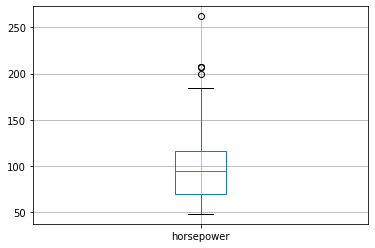

In [477]:
df.boxplot(column=['horsepower'])

In [478]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

46.0


In [479]:
df.horsepower.mode()


0    68.0
Name: horsepower, dtype: float64

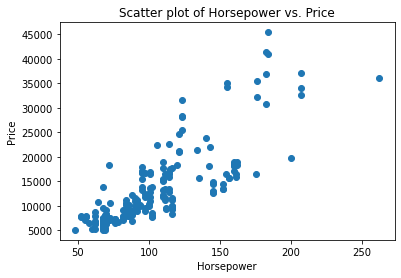

In [480]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter plot of Horsepower vs. Price')
plt.show()


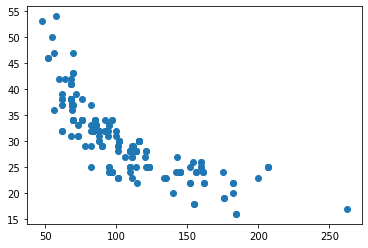

In [481]:
plt.scatter(df['horsepower'], df['highway_mpg'])
#it clearly shows the highway_mpg and horespower has linear relationship, hence lets fill the missing values in horespower, based on the highway_mpg

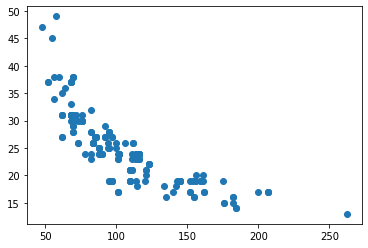

In [482]:
plt.scatter(df['horsepower'], df['city_mpg'])


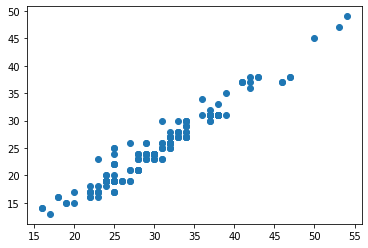

In [483]:
plt.scatter(df['highway_mpg'], df['city_mpg']) 
#looks both are good to go, to fill the na of horsepower

In [484]:
from sklearn.linear_model import LinearRegression
new_df = df[['horsepower', 'highway_mpg', 'city_mpg']]

# splitting the data into two sets: one with missing 'horsepower' values and one without
missing = new_df[new_df['horsepower'].isna()]
not_missing = new_df.dropna(subset=['horsepower'])

# training a linear regression model on the data without missing values
lr = LinearRegression()
lr.fit(not_missing[['highway_mpg', 'city_mpg']], not_missing['horsepower'])

# predicting the missing values using the trained model
missing['horsepower'] = lr.predict(missing[['highway_mpg', 'city_mpg']])

# # combine the data back into a single DataFrame
df.update(missing)

<ipython-input-484-5c62b91c953e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['horsepower'] = lr.predict(missing[['highway_mpg', 'city_mpg']])


<Axes: >

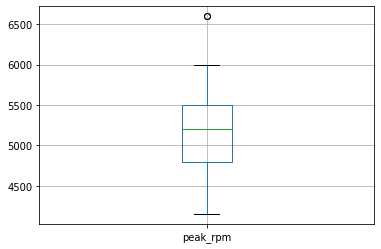

In [485]:
df.boxplot(column=['peak_rpm'])

In [486]:
df.peak_rpm.describe()
#data looks good, we can fill the na with mean value itself

count     199.000000
mean     5117.587940
std       480.521824
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [487]:
df['peak_rpm'] = df['peak_rpm'].astype(float)
mean_val = df['peak_rpm'].mean()
df['peak_rpm'].fillna(mean_val, inplace=True)

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

<Axes: >

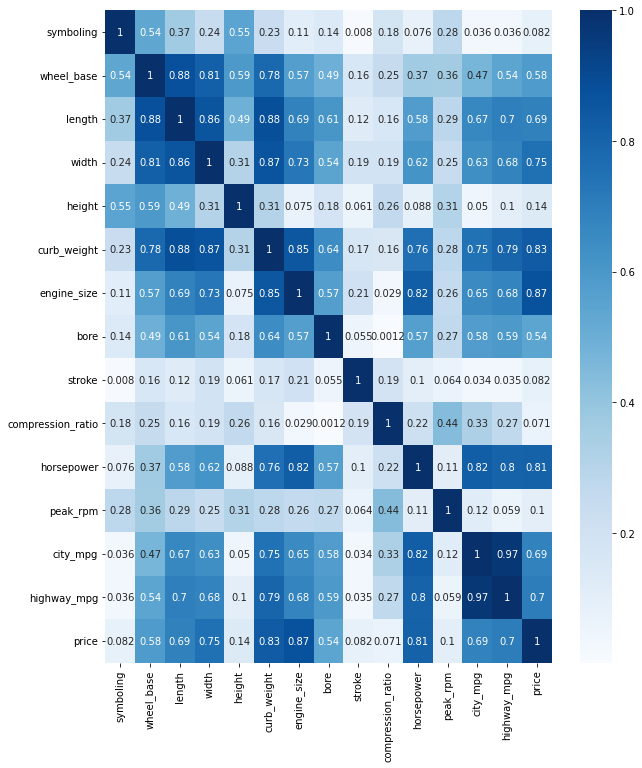

In [489]:
corrmat=df.corr()
fig, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(corrmat.abs(), annot=True, cmap='Blues', ax=ax)

In [490]:
df_desc=df.describe()

In [491]:
df_desc

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.490344,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.377263,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [492]:
iqr = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc.loc['IQR'] = iqr
df_desc


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.490344,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.377263,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000
IQR,2.000000,7.900000,16.700000,2.500000,3.500000,757.000000,43.000000,0.430000,0.300000,0.800000,46.000000,700.000000,11.000000,9.000000,8725.000000


In [493]:
lb = df_desc.loc['25%'] - (1.5 * df_desc.loc['IQR'])
ub = df_desc.loc['75%'] + (1.5* df_desc.loc['IQR'])
df_desc.loc['LB'] = lb
df_desc.loc['UB'] = ub
o_lb = (((df_desc.loc['min'] / df_desc.loc['LB']) / df_desc.loc['LB'])*100)
o_ub = (((df_desc.loc['max'] - df_desc.loc['UB']) / df_desc.loc['UB'])*100)
df_desc.loc['O_LB'] = o_lb
df_desc.loc['O_UB'] = o_ub
df_desc # here we can see lots of outliers in the data, will see its reasonable or how.


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.490344,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.377263,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000
IQR,2.000000,7.900000,16.700000,2.500000,3.500000,757.000000,43.000000,0.430000,0.300000,0.800000,46.000000,700.000000,11.000000,9.000000,8725.000000
LB,-3.000000,82.650000,141.750000,60.350000,46.750000,1033.500000,33.500000,2.505000,2.660000,7.400000,1.000000,3750.000000,2.500000,11.500000,-5312.500000


There are some outliers, and it looks ok by browsing the data. Will see the results the will try to fine tune it
# --------- Our cleaning activities are over

# Lets Do some Exploration on the data - (Exploratory Data Analysis) by using some visuals

<ipython-input-494-ce52b32156b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


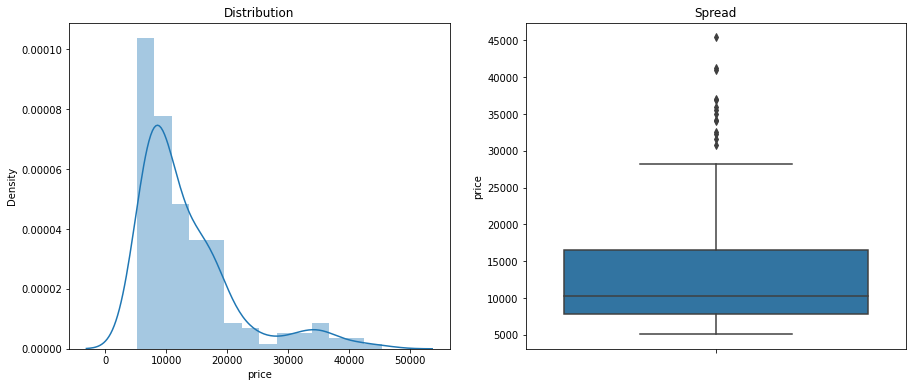

In [494]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df.price)

plt.show()

#### Understanding :
1. The price is right - skewed.
 The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. data points are skewed, hence checking the percentiles in different levels, from 0 to 100% where i can see there are 10% of the data has the range between 22500 to 45000, the rest all the cars are priced under 22500.
3. since the data is skewed, i feel better to apply random forrests or decision trees, lets dig some more then will take a call

In [495]:
df.price.describe(percentiles = [0.10,0.25,0.40,0.50,0.60,0.75,0.80,0.85,0.90,1])

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
10%       6649.000000
25%       7775.000000
40%       9095.000000
50%      10295.000000
60%      12440.000000
75%      16500.000000
80%      17199.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

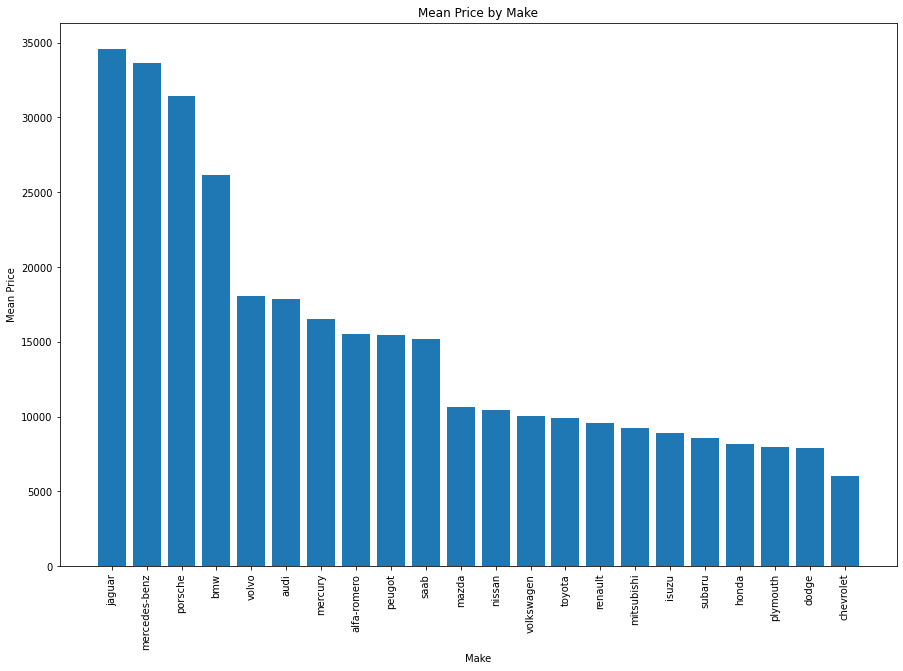

In [496]:
make_price = df.groupby('make')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.bar(make_price.index, make_price.values)
plt.xticks(rotation=90)
plt.title('Mean Price by Make')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.show()

<ipython-input-497-19708815cbde>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


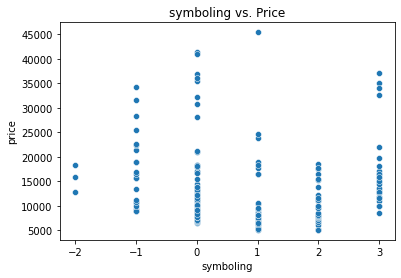

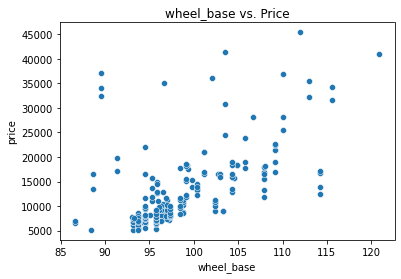

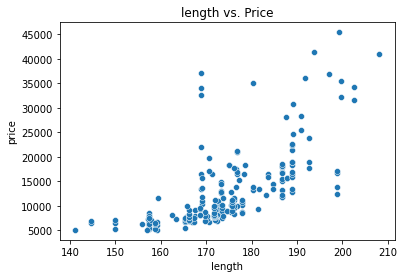

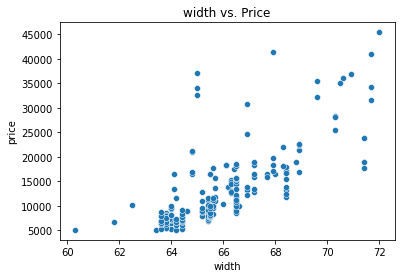

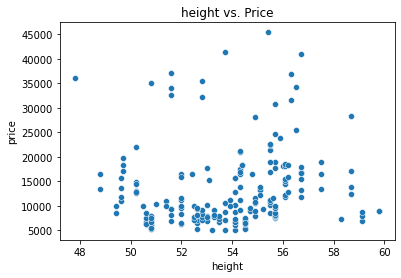

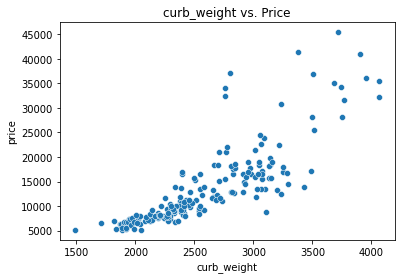

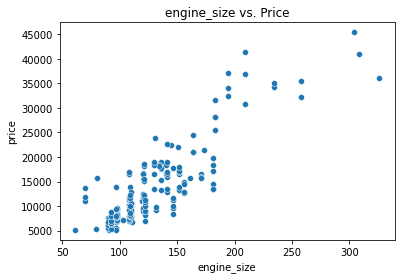

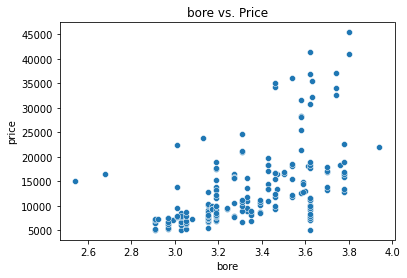

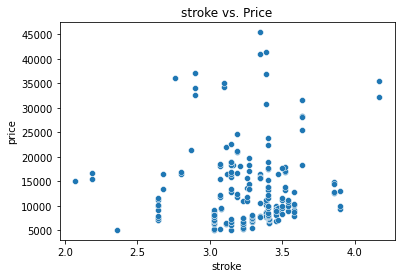

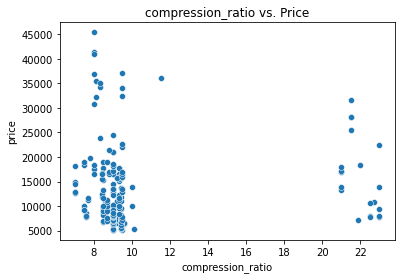

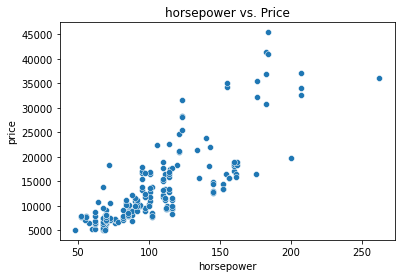

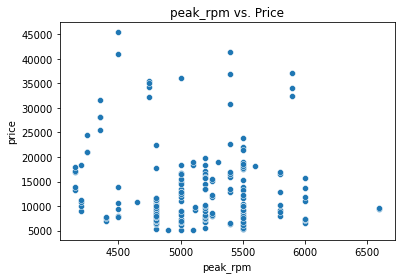

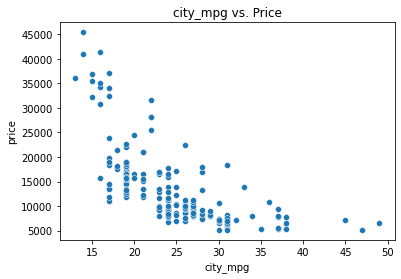

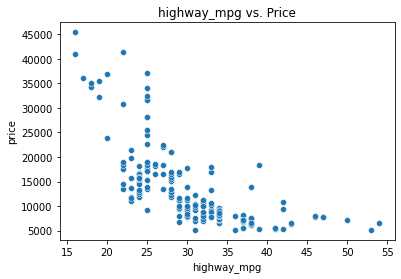

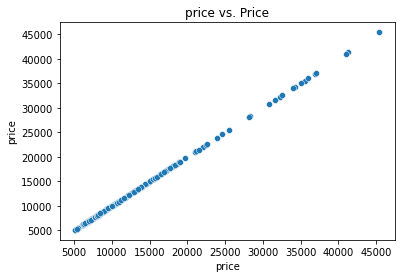

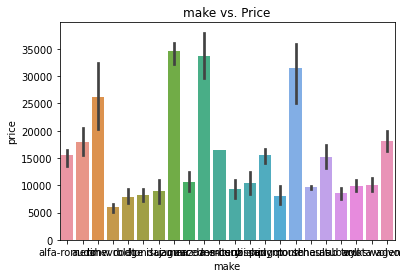

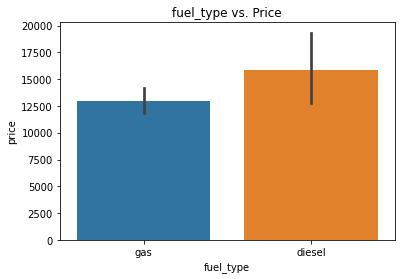

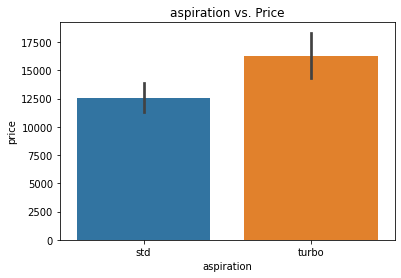

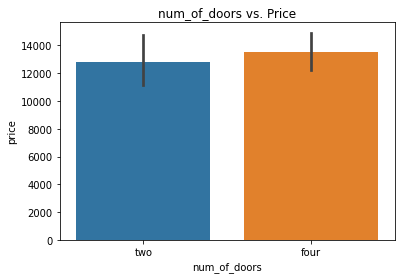

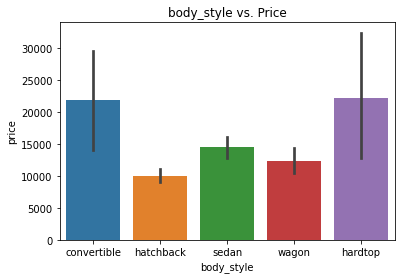

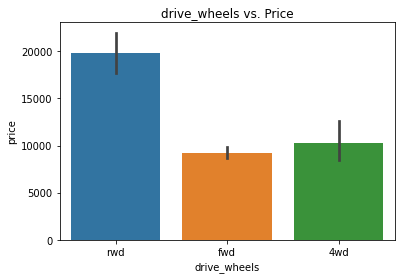

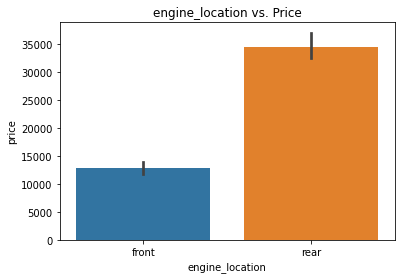

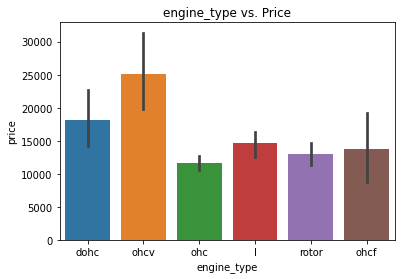

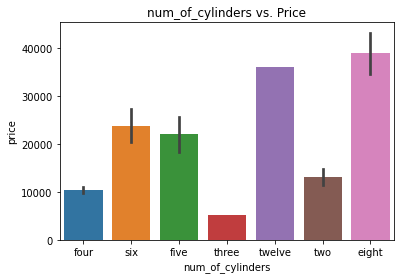

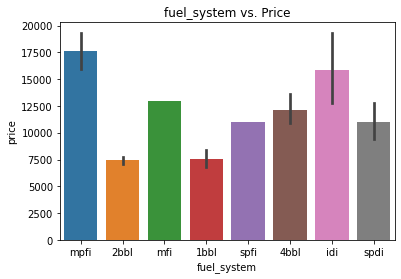

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
string_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_cols:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f"{col} vs. Price")

for col in string_cols:
    plt.figure()
    sns.barplot(data=df, x=col, y='price')
    plt.title(f"{col} vs. Price")


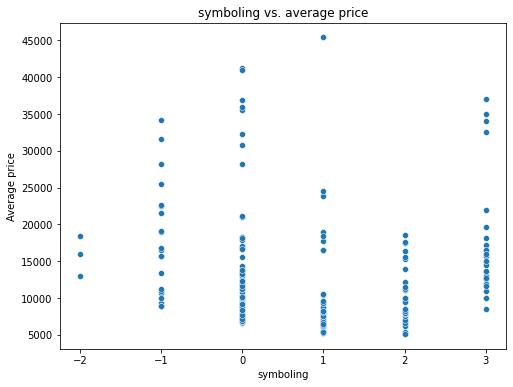

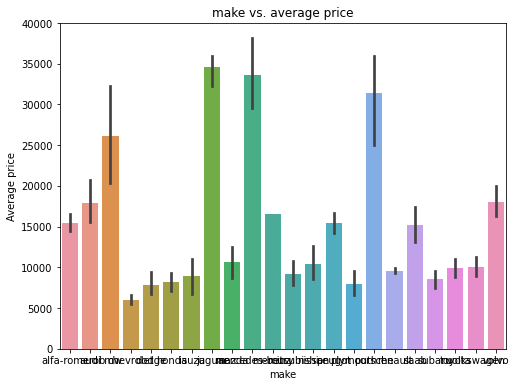

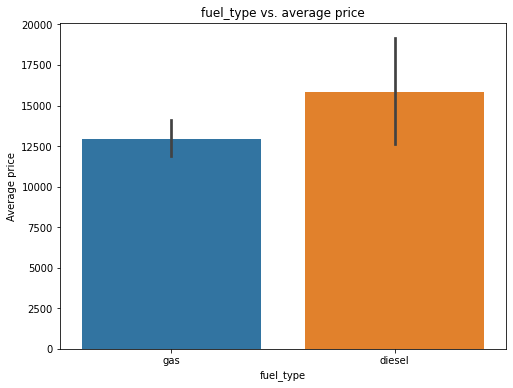

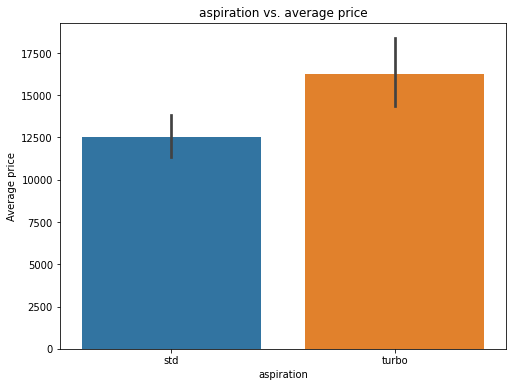

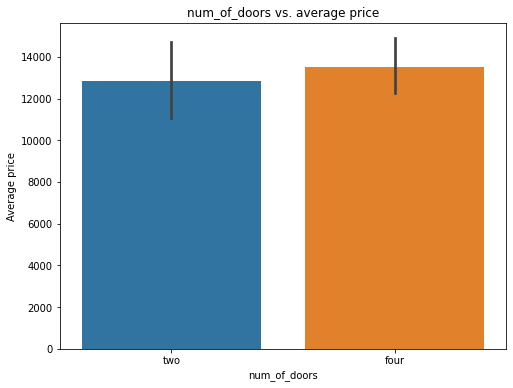

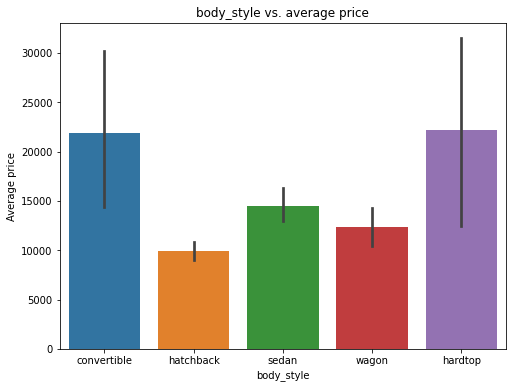

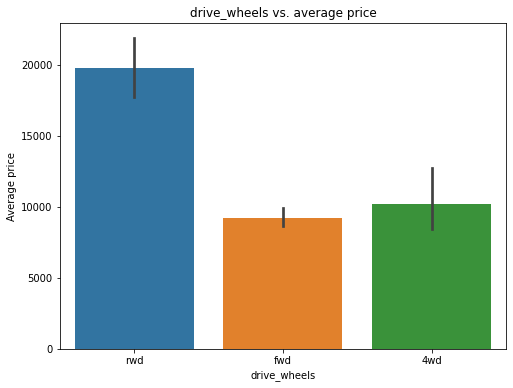

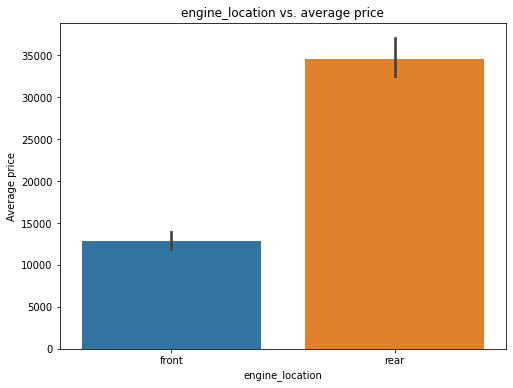

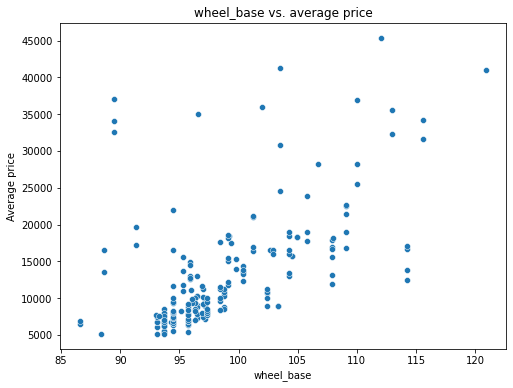

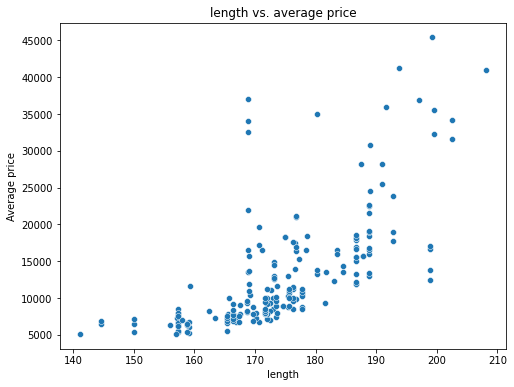

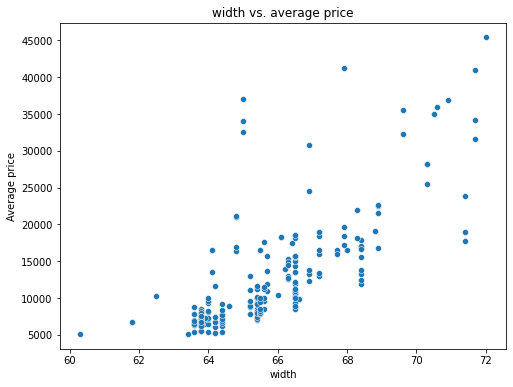

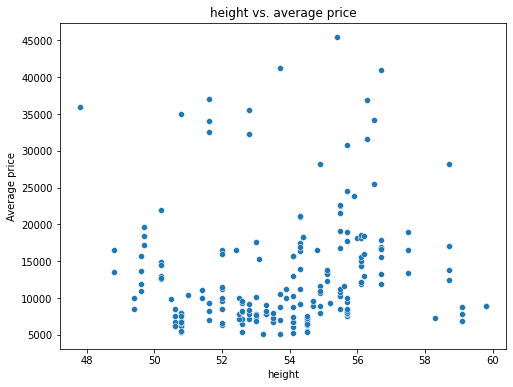

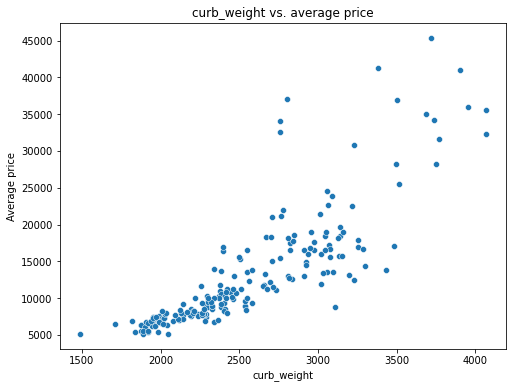

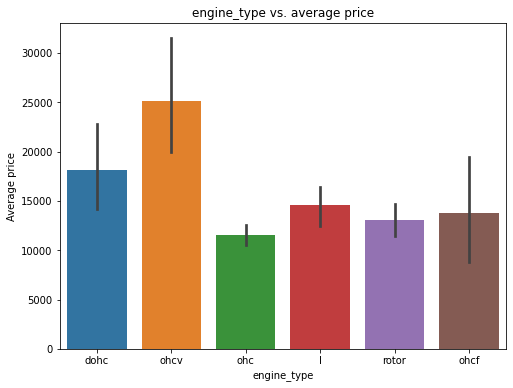

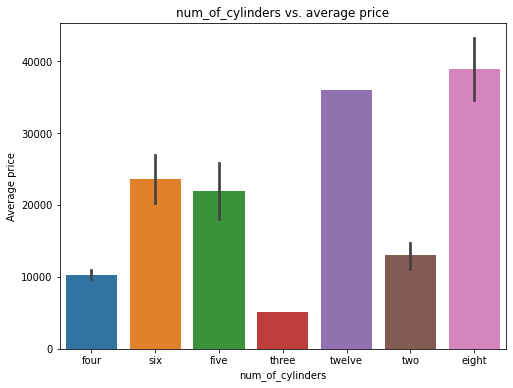

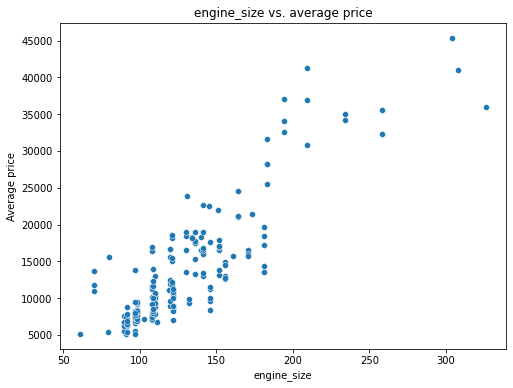

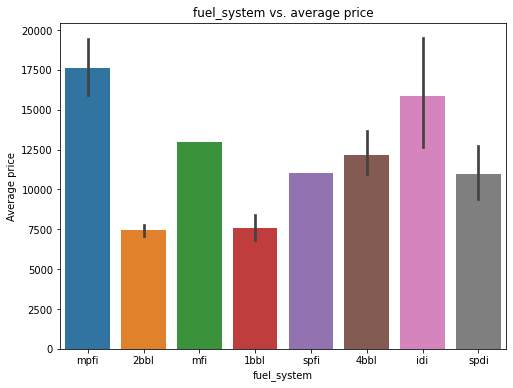

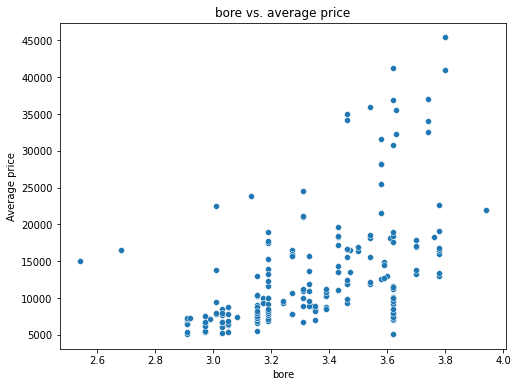

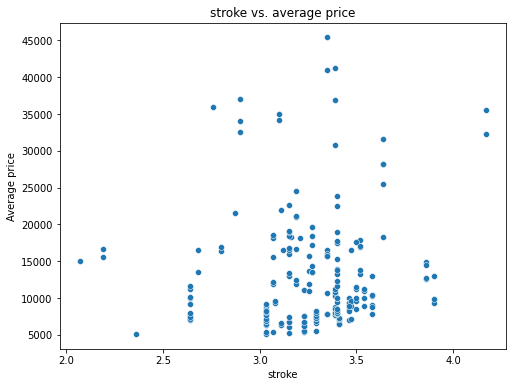

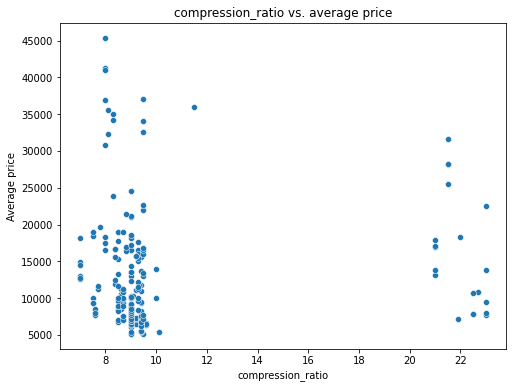

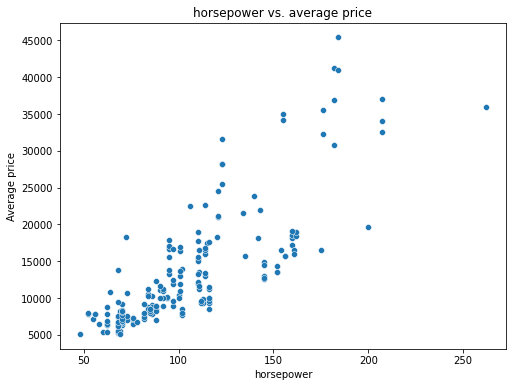

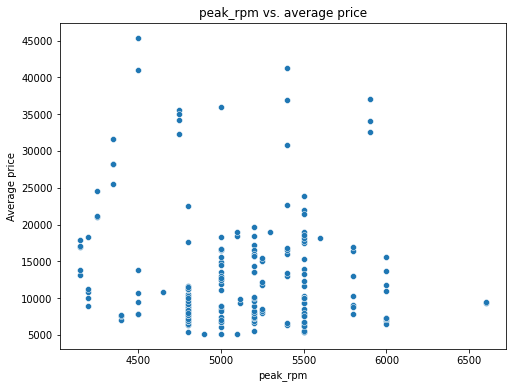

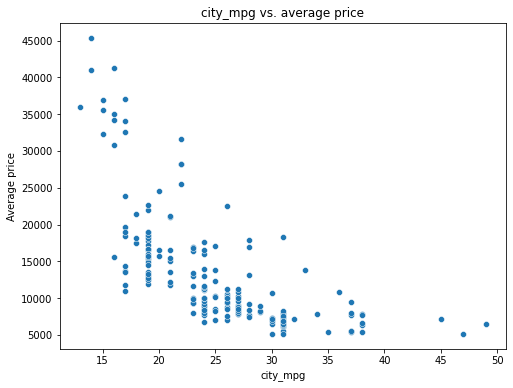

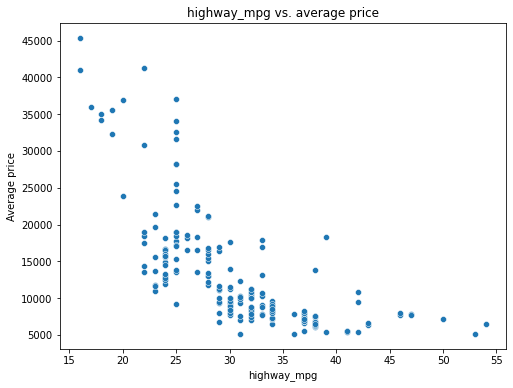

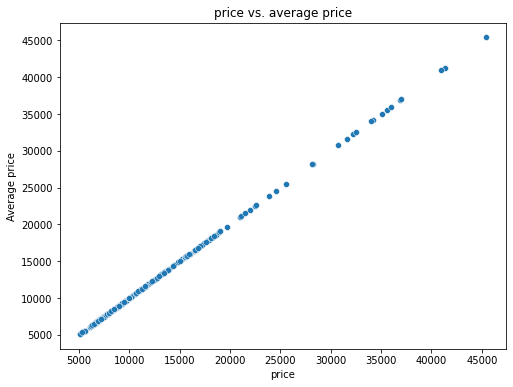

In [498]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.title(f"{column} vs. average price")
    if df[column].dtype == "object":
        sns.barplot(x=column, y="price", data=df)
    else:
        sns.scatterplot(x=column, y="price", data=df)
    plt.xlabel(column)
    plt.ylabel("Average price")
    plt.show()


Am going to use Correlation method to apply to know the relationship with the price, to find out the best columns

In [499]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.490344,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.377263,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


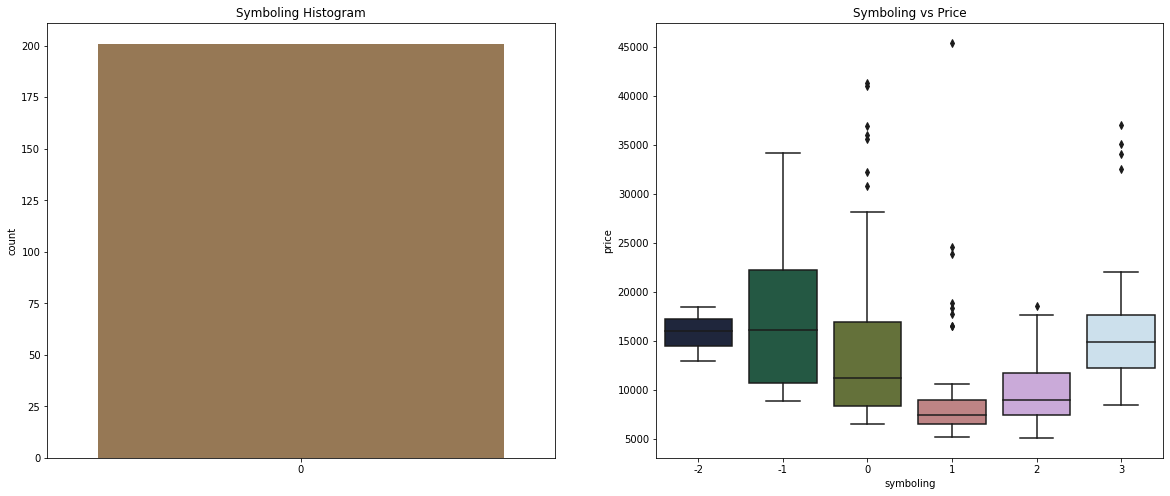

In [500]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

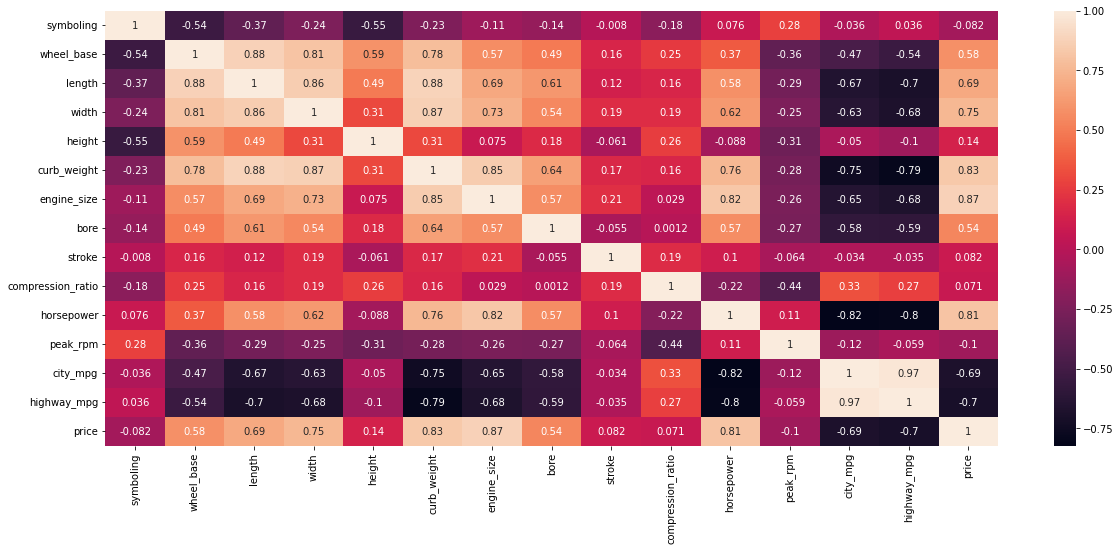

In [501]:
plt.figure(figsize=(20,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [507]:
import pandas as pd

unique_values = pd.DataFrame()
for col in df.columns:
    col_unique = df[col].unique()
    col_unique_df = pd.DataFrame({col: col_unique})
    unique_values = pd.concat([unique_values, col_unique_df], axis=1)


unique_values


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495
1,1.0,audi,diesel,turbo,four,hatchback,fwd,rear,94.5,171.2,...,152.0,2bbl,2.68,3.47,10.0,154.0,5500.0,19.0,26.0,16500
2,2.0,bmw,NaN,NaN,NaN,sedan,4wd,NaN,99.8,176.6,...,109.0,mfi,3.19,3.40,8.0,102.0,5800.0,24.0,30.0,13950
3,0.0,chevrolet,NaN,NaN,NaN,wagon,NaN,NaN,99.4,177.3,...,136.0,1bbl,3.13,2.80,8.5,115.0,4250.0,18.0,22.0,17450
4,-1.0,dodge,NaN,NaN,NaN,hardtop,NaN,NaN,105.8,192.7,...,131.0,spfi,3.50,3.19,8.3,110.0,5400.0,17.0,25.0,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16845
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19045
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21485
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22470


In [508]:
xdf=df.copy()

#enCoding the data after Exploratory i have done the Encoding, it suppose to be done before eda, hence again am doing the eda while doing feature selection

In [509]:
df=xdf
df['num_of_doors'] = df['num_of_doors'].map({'two': 2, 'four': 4})
df['num_of_cylinders'] = df['num_of_cylinders'].map({'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})


df['make'] = df['make'].astype('category').cat.codes
df['fuel_type'] = df['fuel_type'].astype('category').cat.codes
df['aspiration'] = df['aspiration'].astype('category').cat.codes
df['body_style'] = df['body_style'].astype('category').cat.codes
df['drive_wheels'] = df['drive_wheels'].astype('category').cat.codes
df['engine_location'] = df['engine_location'].astype('category').cat.codes
df['engine_type'] = df['engine_type'].astype('category').cat.codes
df['fuel_system'] = df['fuel_system'].astype('category').cat.codes


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    int8   
 2   fuel_type          201 non-null    int8   
 3   aspiration         201 non-null    int8   
 4   num_of_doors       201 non-null    int64  
 5   body_style         201 non-null    int8   
 6   drive_wheels       201 non-null    int8   
 7   engine_location    201 non-null    int8   
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    int8   
 14  num_of_cylinders   197 non-null    float64
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [539]:
df.info()
df.to_csv('reg_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   make               197 non-null    int8   
 2   fuel_type          197 non-null    int8   
 3   aspiration         197 non-null    int8   
 4   num_of_doors       197 non-null    int64  
 5   body_style         197 non-null    int8   
 6   drive_wheels       197 non-null    int8   
 7   engine_location    197 non-null    int8   
 8   wheel_base         197 non-null    float64
 9   length             197 non-null    float64
 10  width              197 non-null    float64
 11  height             197 non-null    float64
 12  curb_weight        197 non-null    int64  
 13  engine_type        197 non-null    int8   
 14  num_of_cylinders   197 non-null    float64
 15  engine_size        197 non-null    int64  
 16  fuel_system        197 non

In [556]:
rdf = pd.read_csv ('reg_data.csv')
df['temp']=df['price']
print('symboling:', df['symboling'].corr(df['temp']))
print('make:', df['make'].corr(df['temp']))
print('fuel_type:', df['fuel_type'].corr(df['temp']))
print('aspiration:', df['aspiration'].corr(df['temp']))
print('num_of_doors:', df['num_of_doors'].corr(df['temp']))
print('body_style:', df['body_style'].corr(df['temp']))
print('drive_wheels:', df['drive_wheels'].corr(df['temp']))
print('engine_location:', df['engine_location'].corr(df['temp']))
print('wheel_base:', df['wheel_base'].corr(df['temp']))
print('length:', df['length'].corr(df['temp']))
print('width:', df['width'].corr(df['temp']))
print('height:', df['height'].corr(df['temp']))
print('curb_weight:', df['curb_weight'].corr(df['temp']))
print('engine_type:', df['engine_type'].corr(df['temp']))
print('num_of_cylinders:', df['num_of_cylinders'].corr(df['temp']))
print('engine_size:', df['engine_size'].corr(df['temp']))
print('fuel_system:', df['fuel_system'].corr(df['temp']))
print('bore:', df['bore'].corr(df['temp']))
print('stroke:', df['stroke'].corr(df['temp']))
print('compression_ratio:', df['compression_ratio'].corr(df['temp']))
print('horsepower:', df['horsepower'].corr(df['temp']))
print('peak_rpm:', df['peak_rpm'].corr(df['temp']))
print('city_mpg:', df['city_mpg'].corr(df['temp']))
print('highway_mpg:', df['highway_mpg'].corr(df['temp']))

symboling: -0.08418982155085801
make: -0.16485860197626873
fuel_type: -0.11034731297012804
aspiration: 0.17984656081028552
num_of_doors: 0.04248355130796434
body_style: -0.07369732132641849
drive_wheels: 0.5982316998959957
engine_location: 0.33122573712588477
wheel_base: 0.586660811738428
length: 0.6920432470598116
width: 0.7516743560195773
height: 0.1389074198644081
curb_weight: 0.8350730249031775
engine_type: 0.14404691486681434
num_of_cylinders: 0.7468703522532048
engine_size: 0.8875082414730278
fuel_system: 0.521895307811707
bore: 0.543435866418855
stroke: 0.08230982738970488
compression_ratio: 0.07107893036464856
horsepower: 0.808751032402846
peak_rpm: -0.10440124733345318
city_mpg: -0.6997383877752549
highway_mpg: -0.7149407718808669


#feature selection

In [550]:
#selecting the following variables as the linear corrleation in the requeired range
# highway_mpg
# city_mpg
# fuel_system
# bore
# wheel_base
# drive_wheels
# length
# num_of_cylinders
# width
# horsepower
# curb_weight
# engine_size


In [557]:
rdf=rdf.drop(['fuel_type'], axis=1)
rdf=rdf.drop(['peak_rpm'], axis=1)
rdf=rdf.drop(['symboling'], axis=1)
rdf=rdf.drop(['body_style'], axis=1)
rdf=rdf.drop(['num_of_doors'], axis=1)
rdf=rdf.drop(['compression_ratio'], axis=1)
rdf=rdf.drop(['stroke'], axis=1)
rdf=rdf.drop(['height'], axis=1)
rdf=rdf.drop(['engine_type'], axis=1)
rdf=rdf.drop(['aspiration'], axis=1)
rdf=rdf.drop(['engine_location'], axis=1)
rdf=rdf.drop(['temp'],axis=1)

In [561]:

rdf


,make,drive_wheels,wheel_base,length,width,curb_weight,num_of_cylinders,engine_size,fuel_system,bore,horsepower,city_mpg,highway_mpg,price
0,0,2,88.6,168.8,64.1,2548,4.0,130,5,3.47,111.0,21.0,27.0,13495
1,0,2,88.6,168.8,64.1,2548,4.0,130,5,3.47,111.0,21.0,27.0,16500
2,0,2,94.5,171.2,65.5,2823,6.0,152,5,2.68,154.0,19.0,26.0,16500
3,1,1,99.8,176.6,66.2,2337,4.0,109,5,3.19,102.0,24.0,30.0,13950
4,1,0,99.4,176.6,66.4,2824,5.0,136,5,3.19,115.0,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,21,2,109.1,188.8,68.9,2952,4.0,141,5,3.78,114.0,23.0,28.0,16845
193,21,2,109.1,188.8,68.8,3049,4.0,141,5,3.78,160.0,19.0,25.0,19045
194,21,2,109.1,188.8,68.9,3012,6.0,173,5,3.58,134.0,18.0,23.0,21485
195,21,2,109.1,188.8,68.9,3217,6.0,145,3,3.01,106.0,26.0,27.0,22470


#Spliting the data & importing necessary items for ML

In [562]:
#scale the data
X=rdf.iloc[:,0:-1]
y=rdf.iloc[:,-1]

In [563]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [564]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [565]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [566]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [568]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor())
]


# Evaluating the model

In [569]:

results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append([r2, mse])
    names.append(name)
    print(name, "R-squared:", r2, "MSE:", mse)

# Comparing the models
results_df = pd.DataFrame(results, columns=['R-squared', 'MSE'], index=names)
results_df.sort_values(by='R-squared', ascending=False, inplace=True)
print(results_df)


LR R-squared: 0.8476744723494865 MSE: 8496241.195238415
Ridge R-squared: 0.8477147078071959 MSE: 8493996.987333328
Lasso R-squared: 0.8476104397377534 MSE: 8499812.733916381
ElasticNet R-squared: 0.8389700294447706 MSE: 8981747.777945455
DT R-squared: 0.8859059709706649 MSE: 6363807.85625
RF R-squared: 0.9278884048602747 MSE: 4022159.0873867096
GBR R-squared: 0.9235895744536936 MSE: 4261934.393306124
            R-squared           MSE
RF           0.927888  4.022159e+06
GBR          0.923590  4.261934e+06
DT           0.885906  6.363808e+06
Ridge        0.847715  8.493997e+06
LR           0.847674  8.496241e+06
Lasso        0.847610  8.499813e+06
ElasticNet   0.838970  8.981748e+06


#in the above output we can see the **random forrest** is provides 
#*best score 0.927888 and low MSE 4.02*
#lets apply it in grid search and select the best model

In [572]:
# Defining the parameter grid for each model
param_grid = {
    'LR': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'DT': {'max_depth': [1, 5, 10, None]},
    'RF': {'n_estimators': [10, 50, 100], 'max_depth': [1, 5, 10, None]},
    'GBR': {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [10, 50, 100], 'max_depth': [1, 5, 10, None]}
}

# Defining the models with their parameter grids
models = {
    'LR': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor()
}

# Performing the GridSearchCV on each model and then it will select the best model too...!!
best_model = None
best_score = -np.inf
for name, model in models.items():
    param_grid_cur = param_grid[name]
    grid = GridSearchCV(model, param_grid_cur, cv=5, scoring='r2')
    grid.fit(X_train, y_train)
    score = grid.best_score_
    if score > best_score:
        best_model = grid.best_estimator_
        best_score = score
print("Best model:", best_model)


Best model: RandomForestRegressor(max_depth=5)


# the best model comes out as RandomForestRegressor